In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/neri/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


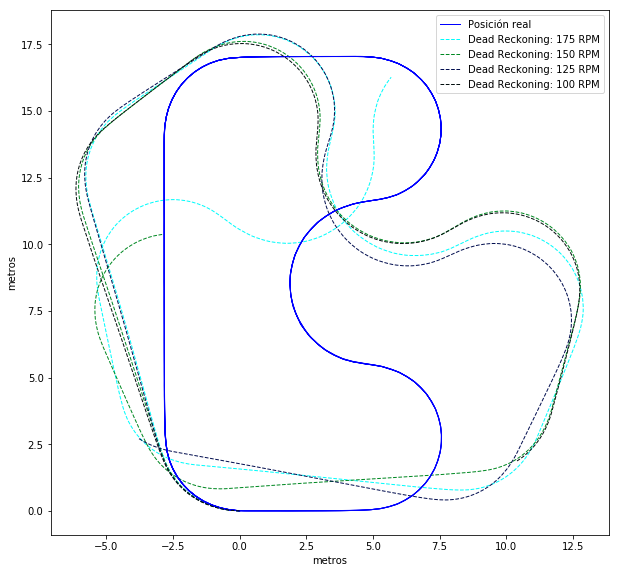

In [10]:
# revision navegación por estima
inicio = 2
fin = 2500

plt.figure(figsize=(10, 10))

# plt.title("Posición con odometría")

path = '../src/tests/velocities/'
files = [('lane_states_-180.log', '#00FCFC', 175,'-'), \
         ('lane_states_-150.log', '#008822', 150,'-'), \
         ('lane_states_-130.log', '#030F50', 125,'-'), \
        ('lane_states_-100.log', '#040F0F', 100,'-')] #yellow

label_pose_real = True
for file, color, vel, style in files:
    df = pd.read_csv(path + file,  sep='\t')

    if label_pose_real:
        plt.plot(df['global_x'].values[inicio:fin] , \
             df['global_y'].values[inicio:fin] - 0.36, color='blue', linewidth=1, linestyle=style, label="Posición real")
        label_pose_real = False
    else:
        plt.plot(df['global_x'].values[inicio:fin] , \
             df['global_y'].values[inicio:fin] - 0.36, color='blue', linewidth=1, linestyle=style)
    
    plt.plot(-df['predicted_x'].values[inicio:fin] , \
         -df['predicted_y'].values[inicio:fin], color=color, linewidth=1, linestyle='--', label="Dead Reckoning: " + str(vel) + " RPM")

#plt.plot(-df['predicted_x'].values[inicio:fin], \
#         -df['predicted_y'].values[inicio:fin], color='k', linewidth=1, linestyle='-.', label='Modelo de bicicleta local')

plt.axes().set_aspect('equal')

plt.axes().set_xlabel('metros')
plt.axes().set_ylabel('metros')

plt.legend()
plt.show()


plt.savefig('demo.png', transparent=True)

In [144]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

inicio = 51

path = '../src/tests/velocities/'
files = [('lane_states_-180.log', '#0FFF00', 175,'-'), \
         ('lane_states_-150.log', '#F0FF00', 150,'-'), \
         ('lane_states_-130.log', '#F0AFF0', 125,'-'), \
        ('lane_states_-100.log', '#FFA500', 100,'-')] #yellow


print ("vel, tiempo, X, Y")
for file, color, vel, style in files:
    df = pd.read_csv(path + file,  sep='\t')
    
    print ("{}\t{}\t{}\t{}".format(vel, '5min', \
           pearson_def(df['global_x'].values[inicio:1500], -df['predicted_x'].values[inicio:1500]), \
           pearson_def(df['global_y'].values[inicio:1500], -df['predicted_y'].values[inicio:1500])))
    
    print ("{}\t{}\t{}\t{}".format(vel, '10min', \
           pearson_def(df['global_x'].values[inicio:len(df['global_x'])-1], -df['predicted_x'].values[inicio:len(df['predicted_x'])-1]), \
           pearson_def(df['global_y'].values[inicio:len(df['global_y'])-1], -df['predicted_y'].values[inicio:len(df['predicted_y'])-1])))


vel, tiempo, X, Y
175	5min	0.5874961982648819	0.8706363560797945
175	10min	0.18579442783416333	0.1901516551145792
150	5min	0.7668732164675971	0.7840185264080205
150	10min	0.21483908113763114	0.3231396733718088
125	5min	0.7543857648708808	0.9256834566369669
125	10min	0.36659674550593246	0.5808484985942982
100	5min	0.8101092215153438	0.9325204229047838
100	10min	0.41288241952496724	0.7325681172088366


/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


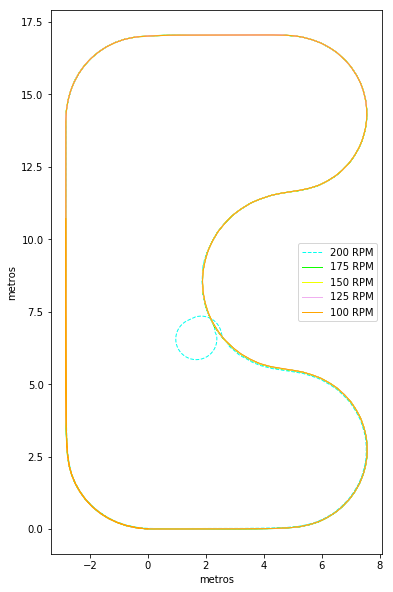

In [105]:
# completaron el circuito con moverse a un punto
inicio = 2
fin = 4000

plt.figure(figsize=(10, 10))

# plt.title("Posición con odometría")

for file, color, vel, style in files:
    df = pd.read_csv(path + file,  sep='\t')
    
    plt.plot(df['global_x'].values[inicio:fin] , \
         df['global_y'].values[inicio:fin] - 0.36, color=color, linewidth=1, linestyle=style, label=str(vel) + " RPM")

plt.plot(-df['predicted_x'].values[inicio:fin], \
         -df['predicted_y'].values[inicio:fin], color='k', linewidth=1, linestyle='-.', label='Modelo de bicicleta local')

plt.axes().set_aspect('equal')

plt.axes().set_xlabel('metros')
plt.axes().set_ylabel('metros')

plt.legend()
plt.show()

In [80]:
df.loc[0:5, ['global_x', 'global_y', 'global_theta']]

,global_x,global_y
0,0.00000,0.00000
1,0.00000,0.00000
2,-0.00002,0.36000
3,-0.00003,0.36000
4,-0.00004,0.36001
5,-0.00005,0.36001
